#### Import Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency


import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

#### Loading Data

In [33]:
datapath = r"..\data\raw\Telco-Customer-Churn.csv"
data = pd.read_csv(datapath)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [35]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [36]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### EDA

##### Feature Encoding

In [37]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
for column in data.columns:
    print(f"{column}\t:\t {data[column].unique()}\n")

customerID	:	 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender	:	 ['Female' 'Male']

SeniorCitizen	:	 [0 1]

Partner	:	 ['Yes' 'No']

Dependents	:	 ['No' 'Yes']

tenure	:	 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService	:	 ['No' 'Yes']

MultipleLines	:	 ['No phone service' 'No' 'Yes']

InternetService	:	 ['DSL' 'Fiber optic' 'No']

OnlineSecurity	:	 ['No' 'Yes' 'No internet service']

OnlineBackup	:	 ['Yes' 'No' 'No internet service']

DeviceProtection	:	 ['No' 'Yes' 'No internet service']

TechSupport	:	 ['No' 'Yes' 'No internet service']

StreamingTV	:	 ['No' 'Yes' 'No internet service']

StreamingMovies	:	 ['No' 'Yes' 'No internet service']

Contract	:	 ['Month-to-month' 'One year' 'Two year']

PaperlessBilling	:	 ['Yes' 'No']

PaymentMethod	:	 ['Electr

In [39]:
onehotencoder = OneHotEncoder(sparse_output=False)

In [40]:
encoded_data = pd.DataFrame()
encoded_data["gender"] = data["gender"].map({'Male': 1, 'Female' : 0})
encoded_data["SeniorCitizen"] = data['SeniorCitizen'].copy()
encoded_data["Partner"] = data["Partner"].map({'Yes': 1, 'No': 0})
encoded_data["Dependents"] = data["Dependents"].map({'Yes': 1, 'No': 0})
encoded_data["tenure"] = data["tenure"].copy()
encoded_data["PhoneService"] = data["PhoneService"].map({'Yes': 1, 'No': 0})
encoded_data["MultipleLines"] = data["MultipleLines"].map({'Yes': 1, 'No': 0, 'No phone service': 0})
encoded_data["InternetService"] = data["InternetService"].map({'DSL': 1, 'Fiber optic': 2, 'No': 0})
encoded_data["OnlineSecurity"] = data["OnlineSecurity"].map({'Yes': 1, 'No': 0, 'No internet service': 0})
encoded_data["OnlineBackup"] = data["OnlineBackup"].map({'Yes': 1, 'No': 0, 'No internet service': 0})
encoded_data["DeviceProtection"] = data["DeviceProtection"].map({'Yes': 1, 'No': 0, 'No internet service': 0})
encoded_data["TechSupport"] = data["TechSupport"].map({'Yes': 1, 'No': 0, 'No internet service': 0})
encoded_data["StreamingTV"] = data["StreamingTV"].map({'Yes': 1, 'No': 0, 'No internet service': 0})
encoded_data["StreamingMovies"] = data["StreamingMovies"].map({'Yes': 1, 'No': 0, 'No internet service': 0})
encoded_data["Contract"] = data["Contract"].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
encoded_data["PaperlessBilling"] = data["PaperlessBilling"].map({'Yes': 1, 'No': 0})

encoded_paymentmethod = onehotencoder.fit_transform(data[["PaymentMethod"]])
encoded_data = pd.concat([encoded_data, pd.DataFrame(encoded_paymentmethod, columns=onehotencoder.get_feature_names_out(["PaymentMethod"]))], axis=1)

encoded_data["MonthlyCharges"] = data["MonthlyCharges"].copy()
encoded_data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
encoded_data["Churn"] = data["Churn"].map({'Yes': 1, 'No': 0})



encoded_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,...,0,0,1,0.0,0.0,1.0,0.0,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,...,0,1,0,0.0,0.0,0.0,1.0,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,...,0,0,1,0.0,0.0,0.0,1.0,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,...,0,1,0,1.0,0.0,0.0,0.0,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,1,0.0,0.0,1.0,0.0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,...,1,1,1,0.0,0.0,0.0,1.0,84.80,1990.50,0
7039,0,0,1,1,72,1,1,2,0,1,...,1,1,1,0.0,1.0,0.0,0.0,103.20,7362.90,0
7040,0,0,1,1,11,0,0,1,1,0,...,0,0,1,0.0,0.0,1.0,0.0,29.60,346.45,0
7041,1,1,1,0,4,1,1,2,0,0,...,0,0,1,0.0,0.0,0.0,1.0,74.40,306.60,1


In [41]:
encoded_data.isnull().sum()

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
InternetService                             0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
Contract                                    0
PaperlessBilling                            0
PaymentMethod_Bank transfer (automatic)     0
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check              0
PaymentMethod_Mailed check                  0
MonthlyCharges                              0
TotalCharges                      

In [42]:
encoded_data = encoded_data.dropna(axis=0)
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   InternetService                          7032 non-null   int64  
 8   OnlineSecurity                           7032 non-null   int64  
 9   OnlineBackup                             7032 non-null   int64  
 10  DeviceProtection                         7032 non-nul

##### Correlation Heatmap

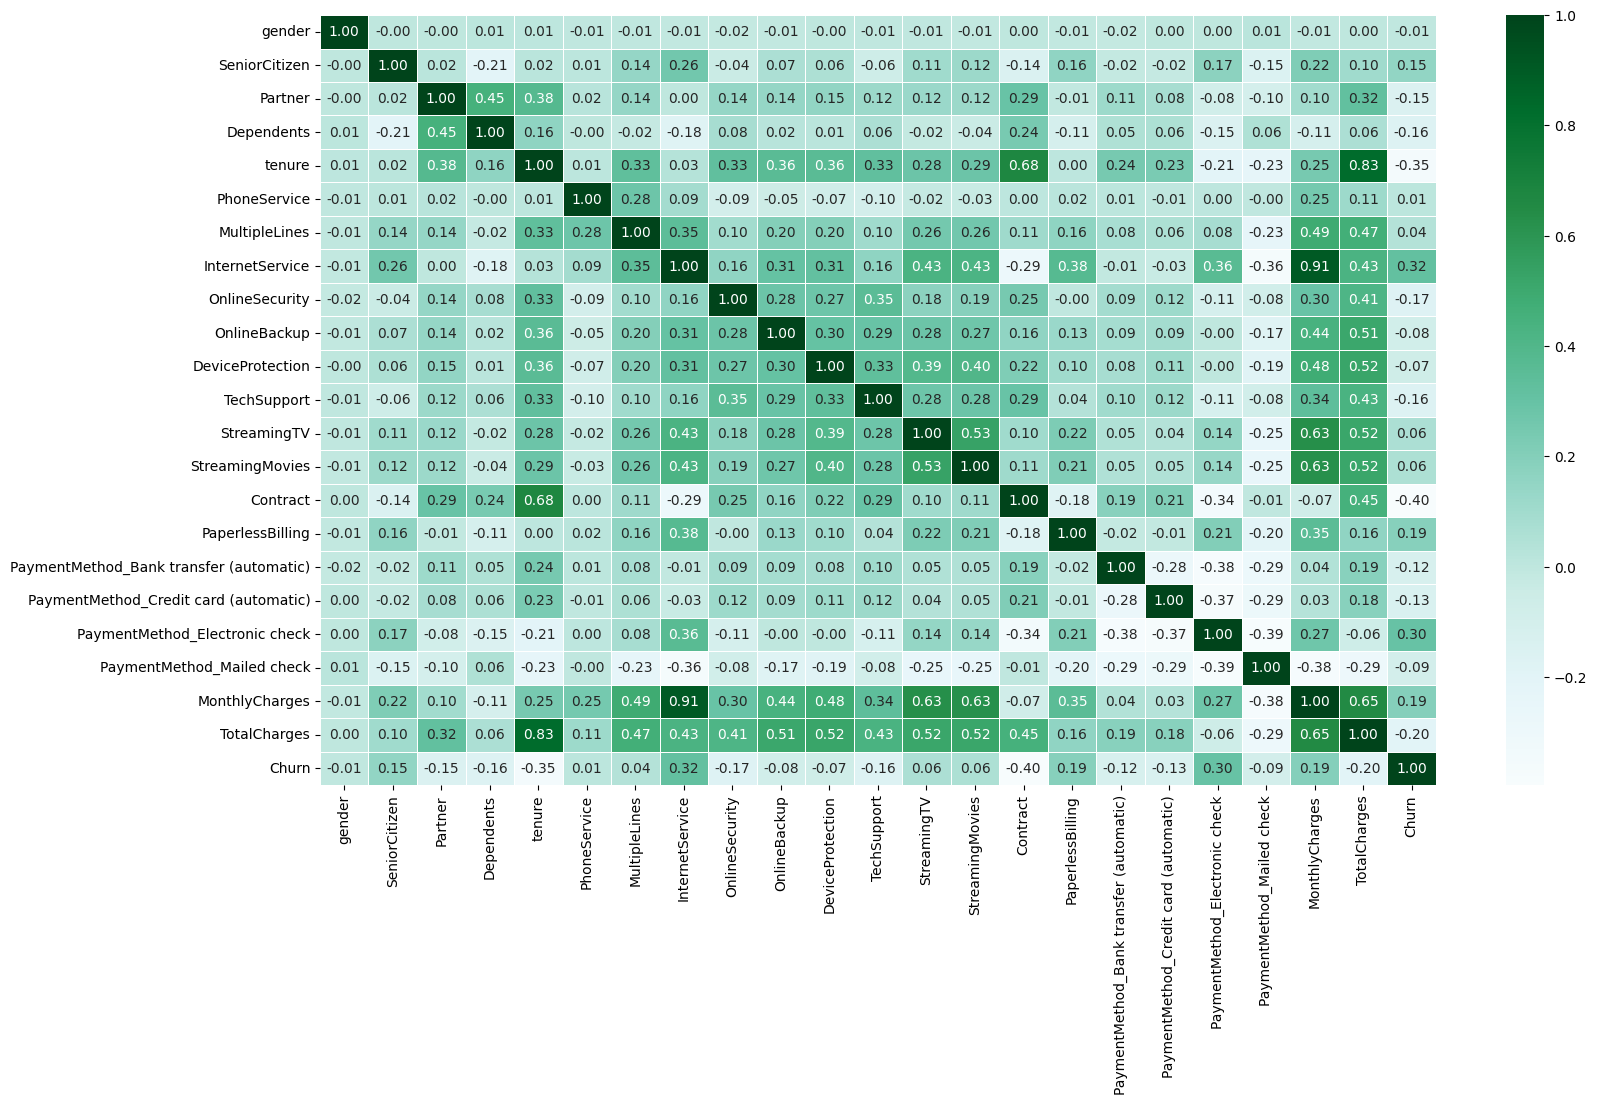

In [43]:
corr_matrix = encoded_data.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, cmap="BuGn", annot=True, fmt=".2f", linewidths=0.5)
plt.show()

##### Original wide range features effect on Churn

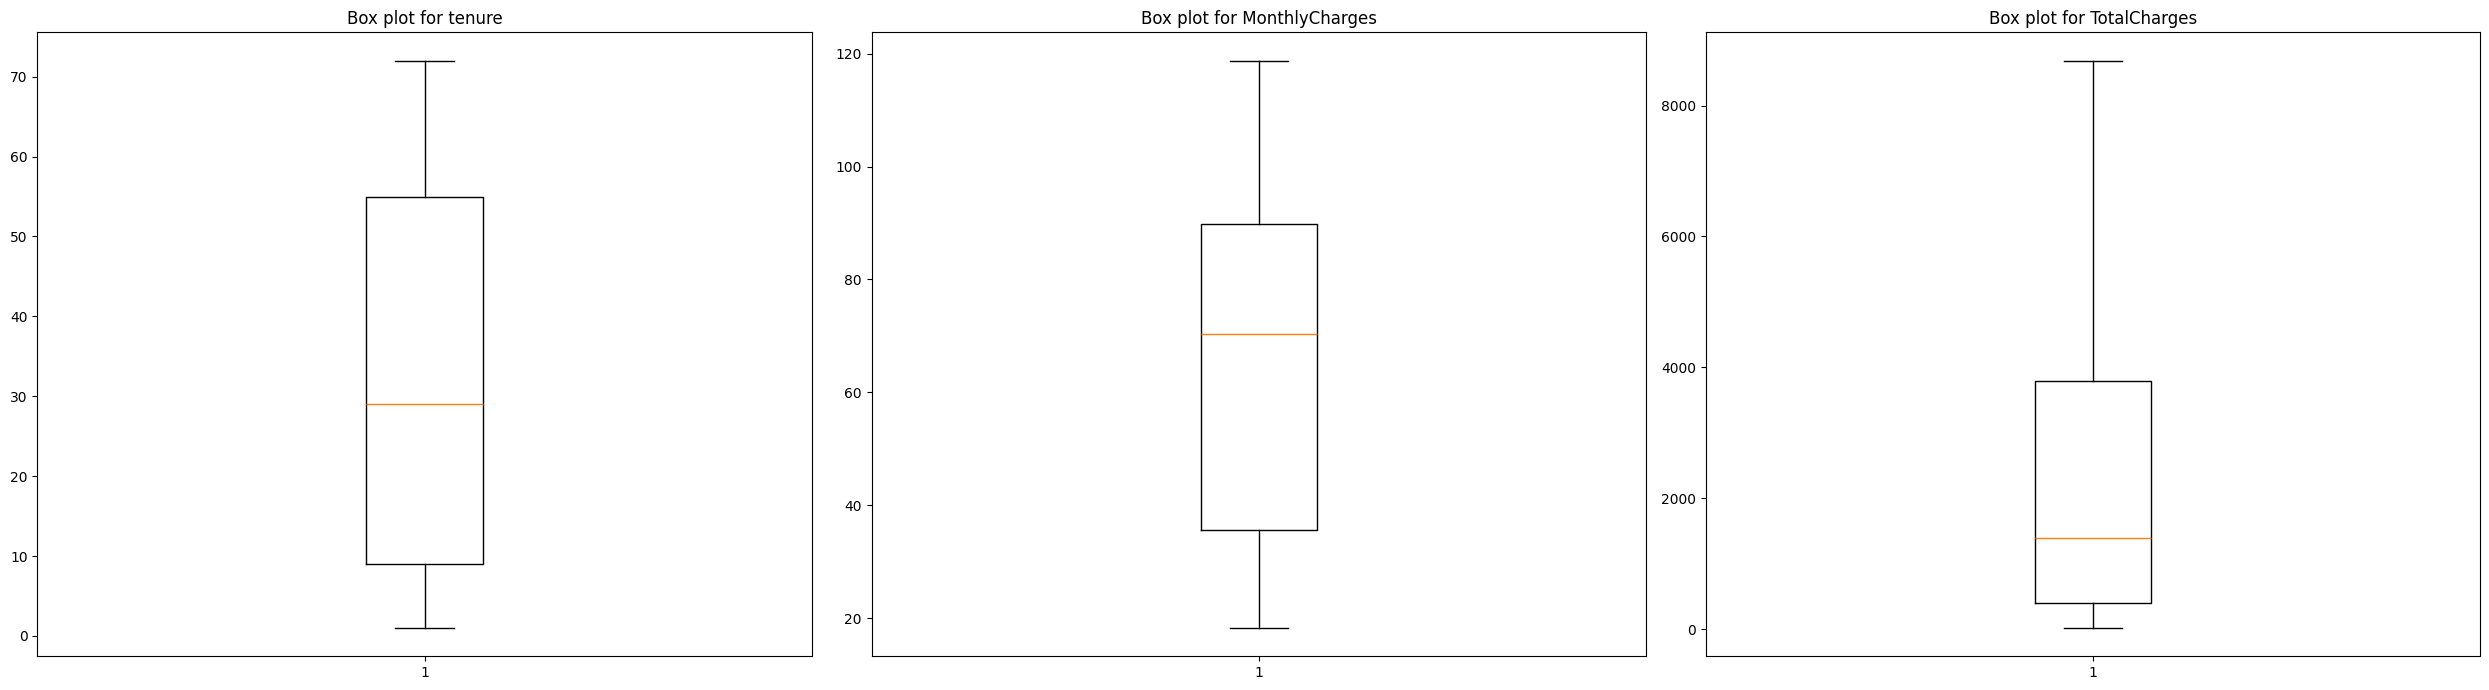

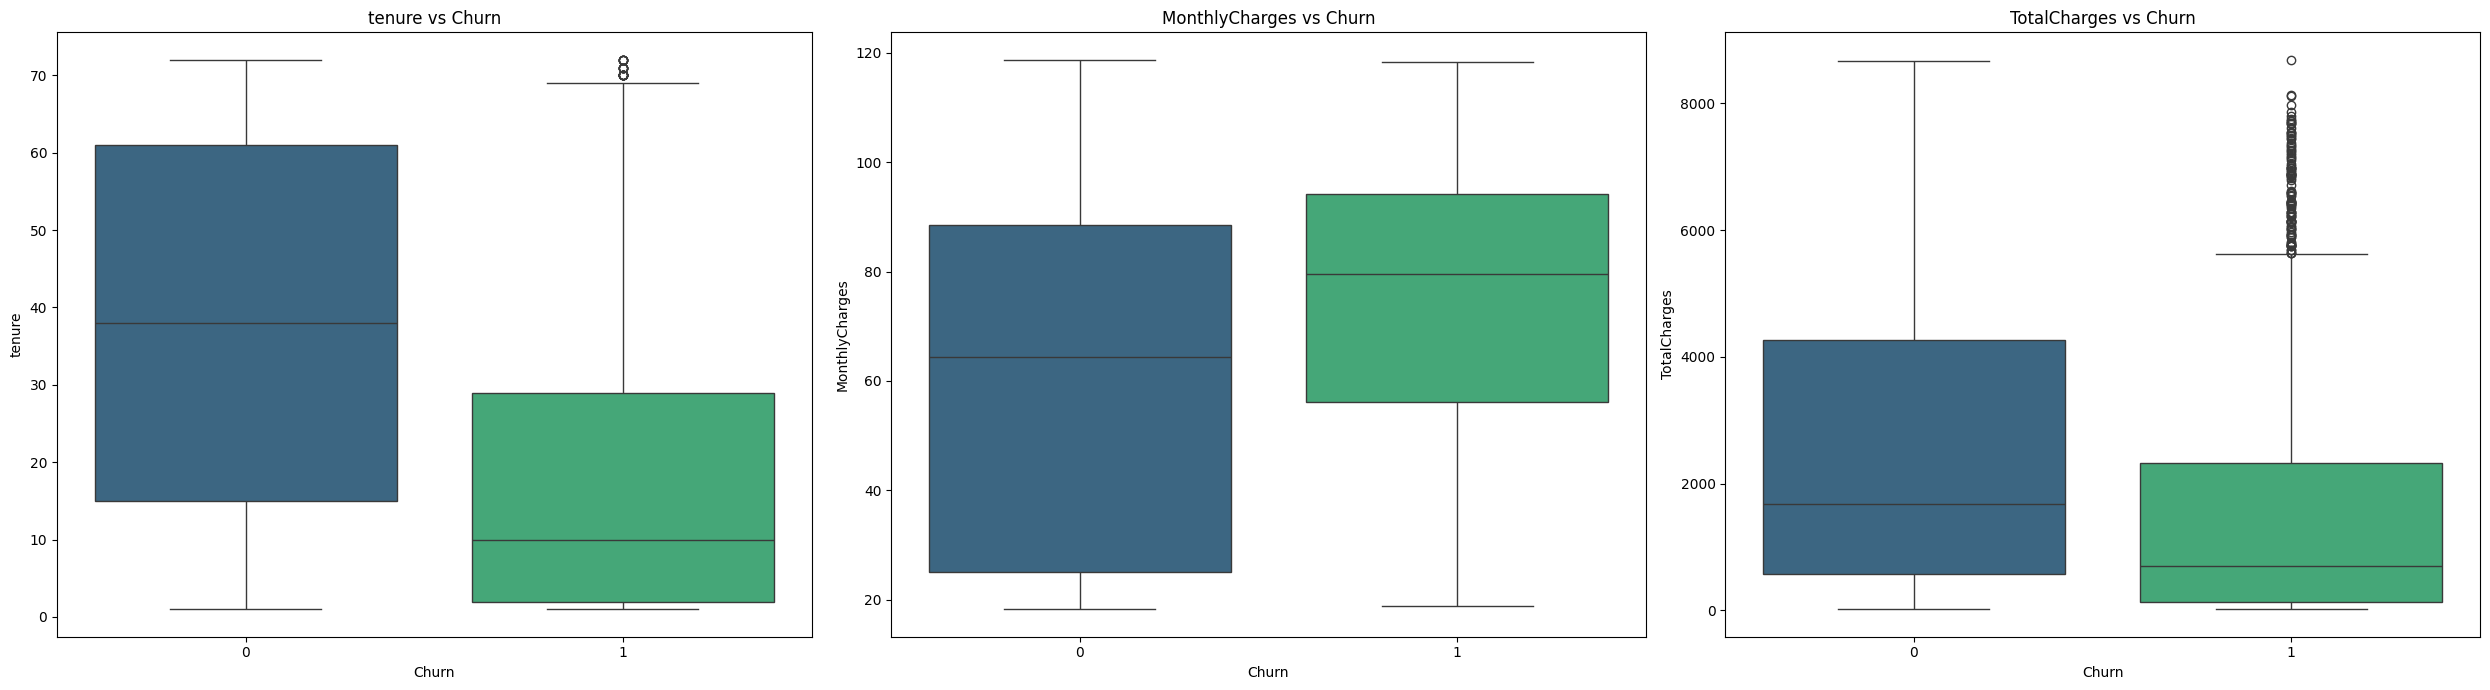

In [44]:
boxplot_columns  = ["tenure", "MonthlyCharges", "TotalCharges"]
num_rows = int(np.ceil(len(boxplot_columns)/3))
num_columns = 3
fig, axes = plt.subplots(num_rows, num_columns, figsize=(25, num_rows*7))
axes = axes.flatten()
for i, column in enumerate(boxplot_columns):
    axes[i].boxplot(encoded_data[column])
    axes[i].set_title(f"Box plot for {column}")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(num_rows, num_columns, figsize=(25, num_rows*7))
axes = axes.flatten()
for i, column in enumerate(boxplot_columns):
    sns.boxplot(x='Churn', y=column, data=encoded_data, ax=axes[i], palette="viridis")
    axes[i].set_title(f"{column} vs Churn")
plt.tight_layout()
plt.show()

##### Chi-Square Test of Independence (To check effect of one categorical variable on another categorical variable)

In [45]:
categorical_columns = ['MultipleLines', 'PaymentMethod_Credit card (automatic)', 'gender', 'PaperlessBilling', 'Dependents', \
                       'PaymentMethod_Bank transfer (automatic)', 'DeviceProtection', 'Churn', 'StreamingMovies', 'InternetService', \
                        'Contract', 'TechSupport', 'PaymentMethod_Mailed check', 'PhoneService', 'OnlineBackup', 'Partner', \
                        'SeniorCitizen',  'OnlineSecurity', 'StreamingTV', 'PaymentMethod_Electronic check']
significance_level = 0.05
irrelevent_features = []
for column in categorical_columns:
    stat_data = pd.crosstab(encoded_data[column], encoded_data["Churn"])
    chi2, p, dof, expected = chi2_contingency(stat_data)
    if p > significance_level:
        print(f"Feature '{column}' and Churn(target variable) are independent, and recommanded to remove from training data.")
        irrelevent_features.append(column)

print(f"\nIrrelevent features : {irrelevent_features}")

Feature 'gender' and Churn(target variable) are independent, and recommanded to remove from training data.
Feature 'PhoneService' and Churn(target variable) are independent, and recommanded to remove from training data.

Irrelevent features : ['gender', 'PhoneService']
